# Chapter 1 - Water Balance
Execute the following code block to initialize this notebook

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

The water balance is an accounting of the movement and storage of water within the biosphere. A generalized water balance equation is defined as,
\begin{equation}
P+w = I+R_s+R_g+E_{surface}+E_{plant}+E_{soil}+\Delta V_{soil}/t+\Delta SWE/t
\end{equation}

$\frac{\partial S}{\partial t}=[P(t)-L\times L\times E_t(t)-E_s(t)-E_{vs}(t)-E_{ss}(t)-R_s(t)-R_g(t)-v_s(t)+w(t)]\\
=\frac{\partial}{\partial t}[V_{vs}(t)+V_{ss}(t)+V_{gs}(t)+V_{SWE}(t)]$

## Precipitation

In [3]:
A=4
A+3

7

## Infiltration

The change in storage can be evaluated as:
\begin{equation}
\Delta S = I-O
\end{equation}

# Precipitation Intensity-Duration-Frequency (IDF) Curves

This example is based on examples from Jorge Ramirez - <a href="http://www.engr.colostate.edu/~ramirez/ce_old/classes/cive322-Ramirez/CIVE322-Basic-Hydrology.htm"> Source Here</a>

In [20]:
Prec=pd.read_csv("./Data/Annual_Freq_Data.txt", delim_whitespace=True, index_col=0)
N=len(Prec)
print('Number of years of annual data: ',N)

Number of years of annual data:  21


Take a look at the first five rows of data, which shows total event precipitation in (mm) for each year, for ecah duration period.

In [21]:
Prec.head()

,5m,10m,15m,30m,1h,2h,6h,12h,24h
Year,,,,,,,,,
1985,2.8,5.3,8.1,10.9,13.7,14.4,24.2,28.0,30.4
1986,2.5,3.9,4.4,5.9,8.6,14.6,36.8,56.3,84.7
1987,1.5,2.5,3.2,5.5,9.9,17.7,33.8,43.2,65.3
1988,2.0,3.2,4.2,5.3,6.8,11.1,27.7,45.0,51.8
1989,3.0,4.3,5.2,6.9,9.3,15.2,30.0,45.6,50.9


Looking at the mean and standard deviation of all available years:

In [24]:
pd.DataFrame([Prec.mean() , Prec.std()] , index=['Mean','Std'])

,5m,10m,15m,30m,1h,2h,6h,12h,24h
Mean,2.652381,3.842857,4.857143,7.061905,10.223810,15.42381,31.757143,44.728571,60.690476
Std,0.819524,1.280458,1.797101,2.498295,2.867561,2.61092,6.036685,8.791083,16.689335


$p=\frac{1}{T}=\frac{m}{N+1}$

In [39]:
F30m = pd.DataFrame(Prec['30m'].sort_values(ascending=False)) # sorted (descending) values for 30m duration events
F30m['m'] = np.arange(1 , N+1) # get index value
F30m['p'] = m/(N+1)
F30m['T'] = 1/p
F30m

,30m,m,p,T
Year,,,,
1996,15.9,1,0.045455,22.000000
1985,10.9,2,0.090909,11.000000
2004,9.2,3,0.136364,7.333333
2005,8.5,4,0.181818,5.500000
2003,8.1,5,0.227273,4.400000
1993,7.4,6,0.272727,3.666667
1989,6.9,7,0.318182,3.142857
1997,6.7,8,0.363636,2.750000
1991,6.4,9,0.409091,2.444444


(1, 100)

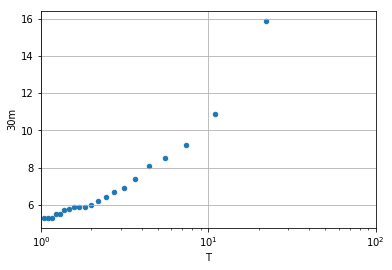

In [45]:
F30m.plot('T' , '30m' , kind='scatter' , logx=True)
plt.grid()
plt.xlim(1,100)

Gumbel Type-1 Distribution
$$G(x,\mu,\beta) = \frac{1}{\beta}e^{\frac{x-\mu}{\beta}e^{-e^{\frac{x-\mu}{\beta}}}}$$

$$K_t=-\frac{\sqrt{6}}{\pi}[0.5772+ln(ln\frac{T}{T-1})]$$

In [57]:
Kt=-6**.5/np.pi*(0.5772+np.log(np.log(T/(T-1))))

In [68]:
Xbar=Prec['30m'].mean()
S=Prec['30m'].std()
Xt=Xbar+Kt*S

In [69]:
T_calc=np.array([2,5,10,25,50,100,1000])
Kt_calc=-6**.5/np.pi*(0.5772+np.log(np.log(T_calc/(T_calc-1))))

In [71]:
(Xbar+Kt_calc*S)/.5

array([13.30300959, 17.71864276, 20.64217613, 24.3360683 , 27.07640852,
       29.79651451, 38.78459445])

In [107]:
Intensity=(np.matrix(Prec.mean()).T+np.dot(np.matrix(Prec.std()).T , np.matrix(Kt_calc)))/\
np.matrix([5/60,10/60,15/60, 30/60, 1, 2, 6, 12, 24]).T
Intensity=pd.DataFrame(Intensity,columns=T_calc,index=[5/60,10/60,15/60, 30/60, 1, 2, 6, 12, 24])
Intensity

,2,5,10,25,50,100,1000
0.083333,30.213074,38.903920,44.658017,51.928333,57.321869,62.675580,80.365913
0.166667,21.795083,28.584551,33.079769,38.759490,42.973031,47.155461,60.975513
0.250000,18.247718,24.600322,28.806298,34.120560,38.062984,41.976297,54.907107
0.500000,13.303010,17.718643,20.642176,24.336068,27.076409,29.796515,38.784594
1.000000,9.752749,12.286897,13.964724,16.084662,17.657353,19.218432,24.376724
2.000000,7.497454,8.651128,9.414960,10.380064,11.096034,11.806716,14.155034
6.000000,5.127581,6.016713,6.605397,7.349200,7.900995,8.448716,10.258558
12.000000,3.607037,4.254448,4.683091,5.224683,5.626466,6.025283,7.343098
24.000000,2.414537,3.029073,3.435949,3.950038,4.331418,4.709983,5.960879


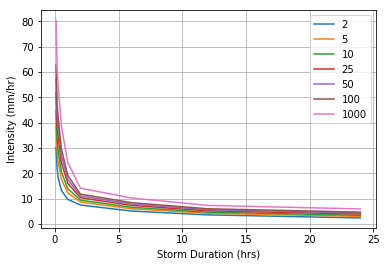

In [110]:
Intensity.plot()
plt.xlabel('Storm Duration (hrs)')
plt.ylabel('Intensity (mm/hr)')
plt.grid()